# Spam Text Classification using NLP & sklearn - Kaggle

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving spam.tsv.txt to spam.tsv.txt


In [0]:
df = pd.read_csv("spam.tsv.txt", sep="\t")

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
# check for null value
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
# check samples or messages
len(df)

5572

In [7]:
# check for distribution of 'label'
df['label'].value_counts(dropna=False)

ham     4825
spam     747
Name: label, dtype: int64

### Balance this data

In [8]:
## Balance this data
ham = df[df['label'] == 'ham']
display(ham.head())

# shape
print("Ham email shape:", ham.shape)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


Ham email shape: (4825, 4)


In [9]:
spam = df[df['label'] == 'spam']
display(spam.head())

print("Spam email Shape:", spam.shape)

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


Spam email Shape: (747, 4)


In [10]:
# select number of ham messages equal to spam message
ham = ham.sample(spam.shape[0])

## 
print("Ham messages after sample", ham.shape)

Ham messages after sample (747, 4)


In [11]:
## Lets combine the spam and ham
data  = ham.append(spam, ignore_index=True)
data.head()

,label,message,length,punct
0,ham,"Dunno, my dad said he coming home 2 bring us o...",111,6
1,ham,Oh k k:)but he is not a big hitter.anyway good,46,3
2,ham,Do u knw dis no. &lt;#&gt; ?,28,7
3,ham,Detroit. The home of snow. Enjoy it.,36,3
4,ham,"Well am officially in a philosophical hole, so...",92,2


In [12]:
## Data shape
print("Data shape: ", data.shape )

Data shape:  (1494, 4)


### Exploratory Data Analysis

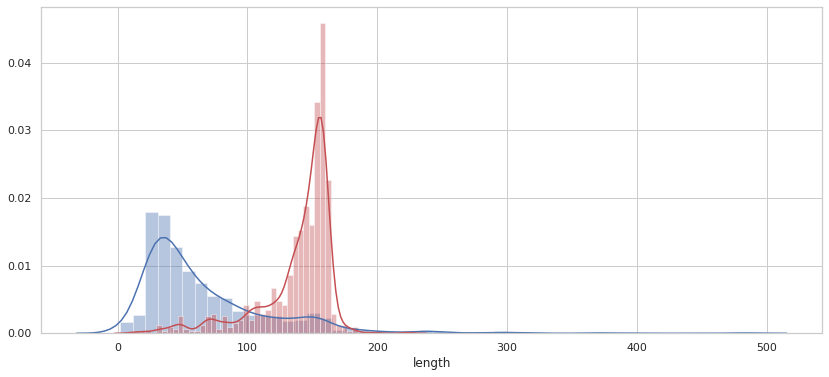

In [13]:
# target variable 'label' vs. 'length' of the messages
sns.set(style="whitegrid")
plt.figure(figsize = (14, 6))
sns.distplot(data[data['label'] == 'ham']['length'], kde=True, bins=50, color="b")
sns.distplot(data[data['label'] == 'spam']['length'], kde=True, bins=50, color="r")

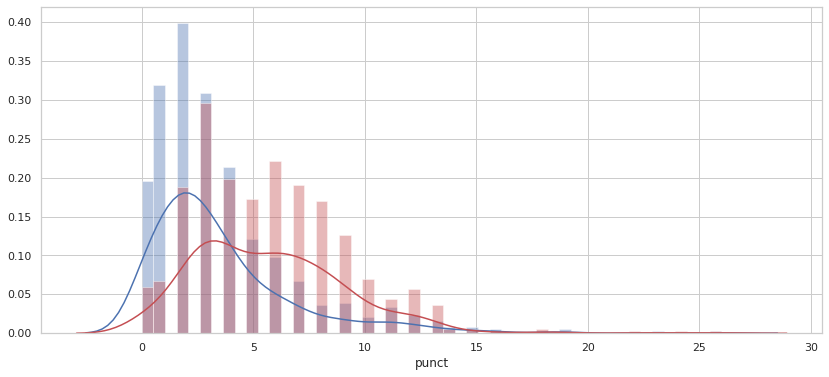

In [14]:
# target variable 'label' vs. 'punct'ation in the messages
sns.set(style="whitegrid")
plt.figure(figsize = (14, 6))
sns.distplot(data[data['label'] == 'ham']['punct'], kde=True, bins=50, color="b")
sns.distplot(data[data['label'] == 'spam']['punct'], kde=True, bins=50, color="r")

## Data Preparation

In [0]:
import nltk
# nltk.download('stopwords')

In [16]:
data.head()

,label,message,length,punct
0,ham,"Dunno, my dad said he coming home 2 bring us o...",111,6
1,ham,Oh k k:)but he is not a big hitter.anyway good,46,3
2,ham,Do u knw dis no. &lt;#&gt; ?,28,7
3,ham,Detroit. The home of snow. Enjoy it.,36,3
4,ham,"Well am officially in a philosophical hole, so...",92,2


In [18]:
data.head()

,label,message,length,punct
0,ham,"Dunno, my dad said he coming home 2 bring us o...",111,6
1,ham,Oh k k:)but he is not a big hitter.anyway good,46,3
2,ham,Do u knw dis no. &lt;#&gt; ?,28,7
3,ham,Detroit. The home of snow. Enjoy it.,36,3
4,ham,"Well am officially in a philosophical hole, so...",92,2


In [19]:
# Change dtype to str
data['message'].dtypes

dtype('O')

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
data.head()

,label,message,length,punct
0,ham,"Dunno, my dad said he coming home 2 bring us o...",111,6
1,ham,Oh k k:)but he is not a big hitter.anyway good,46,3
2,ham,Do u knw dis no. &lt;#&gt; ?,28,7
3,ham,Detroit. The home of snow. Enjoy it.,36,3
4,ham,"Well am officially in a philosophical hole, so...",92,2


In [0]:
## Data Cleaning
def text_data_cleaning(sentence):
  doc = nlp(sentence)


  tokens = []
  ## Lematized and converted text into lower format
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)

  ## Removing stop words and punctuation
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)

  return cleaned_tokens

In [0]:
## split data randomly into train and test
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, 
                                                    random_state = 0, 
                                                    shuffle = True,
                                                    stratify = data['label'])

In [39]:
X_train.head()

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742     Hello. Sort of out in town already. That . So ...
477     Well good morning mr . Hows london treatin' ya...
542                       Wat would u like 4 ur birthday?
1277    Ringtone Club: Gr8 new polys direct to your mo...
Name: message, dtype: object

In [40]:
X_train.dtypes

dtype('O')

In [41]:
y_train.head()

1128    spam
742      ham
477      ham
542      ham
1277    spam
Name: label, dtype: object

### Bag of words

In [0]:
vectorizer = TfidfVectorizer(text_data_cleaning)

In [43]:
X_train = vectorizer.fit_transform(X_train)
X_train.shape

(1045, 3547)

In [44]:
X_train

<1045x3547 sparse matrix of type '<class 'numpy.float64'>'
	with 17542 stored elements in Compressed Sparse Row format>

In [45]:
1045*3378


3530010

## Pipeline  and Classifier

### Random Forest

In [0]:
clf_pipe = make_pipeline(vectorizer, RandomForestClassifier(n_estimators=100, n_jobs=-1))

In [49]:
clf_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8',
                                 input=<function text_data_cleaning at 0x7ff3dec90378>,
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_ac...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                              

In [0]:
y_pred = clf_pipe.predict(X_test)

[[219   6]
 [ 24 200]]


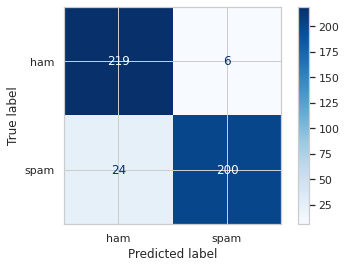

In [51]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf_pipe, X_test, y_test, cmap='Blues', values_format='d')

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.97      0.94       225
        spam       0.97      0.89      0.93       224

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449



In [53]:
print(accuracy_score(y_test, y_pred))

0.933184855233853


In [54]:
## Check for the new messages
clf_pipe.predict(["Hey, whatssip?"])

array(['ham'], dtype=object)

In [55]:
clf_pipe.predict(["Congratulation!, you are selected for EDV lottery 2021"])

array(['ham'], dtype=object)

### Support Vector Machine

In [0]:
svm_clf_pipe = make_pipeline(TfidfVectorizer(), SVC(C = 1000, gamma = 'auto'))

In [57]:
svm_clf_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     de

In [0]:
y_pred = svm_clf_pipe.predict(X_test)

[[219   6]
 [ 18 206]]


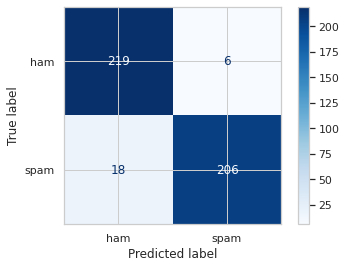

In [59]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(svm_clf_pipe, X_test, y_test, cmap='Blues', values_format='d')

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.97      0.95       225
        spam       0.97      0.92      0.94       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [61]:
print(accuracy_score(y_test, y_pred))

0.9465478841870824


In [62]:
## Check for the new messages
clf_pipe.predict(["Hey, whatssip?"])

array(['ham'], dtype=object)

In [63]:
clf_pipe.predict(["Congratulation!, you are selected for EDV lottery 2021"])

array(['ham'], dtype=object)